<a href="https://colab.research.google.com/github/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/blob/main/TF2_0_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook has my notes of the course:
https://www.youtube.com/watch?v=_mQzgnjzIbI&list=PLDGhkcQt8wV5OKLsVQFGBQc8cxXEk1XGl&index=2

## **Part 1: Using wget**

In [15]:
# download the data from a URL
# source: https://archive.ics.uci.edu/ml/datasets/arrhythmia

!wget https://archive.ics.uci.edu/ml/datasets/arrhythmia/arrhythmia.data

--2022-11-01 20:02:11--  https://archive.ics.uci.edu/ml/datasets/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘arrhythmia.data.1’

arrhythmia.data.1       [ <=>                ]  14.69K  --.-KB/s    in 0.03s   

2022-11-01 20:02:11 (553 KB/s) - ‘arrhythmia.data.1’ saved [15041]



In [42]:
# list files in current directory
!ls
!ls sample_data/

arrhythmia.data  arrhythmia.data.1  sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [69]:
#check if the data has a header
!head sample_data/california_housing_train.csv

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000
-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000
-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000
-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000
-114.590000,33.610000,34.000000,4789.000000,1175.000000,3134.000000

In [76]:
from pandas.io.parsers import python_parser
#check the data
import pandas as pd
df = pd.read_csv("sample_data/california_housing_train.csv")

In [79]:
# since the data has many columns, take just the first few name them (as per the documentation)ç
df.head(6) # cogemos las 6 primeras columnas
# data = df[[0,1,2,3,4,5]]
# data.columns = ['age','sex','height', 'weight','QRS duration', 'P-R interval']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


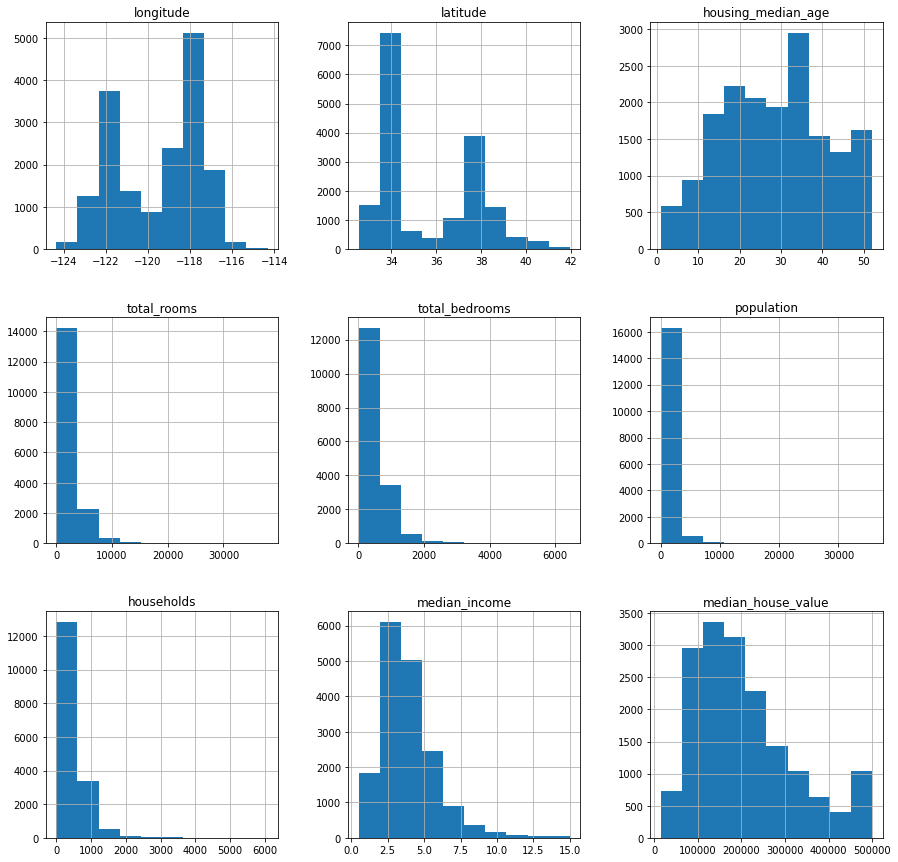

In [81]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,15] # make the plot bigger so the subplots dont overlap
df.hist(); # use a semicolon to surpress return value

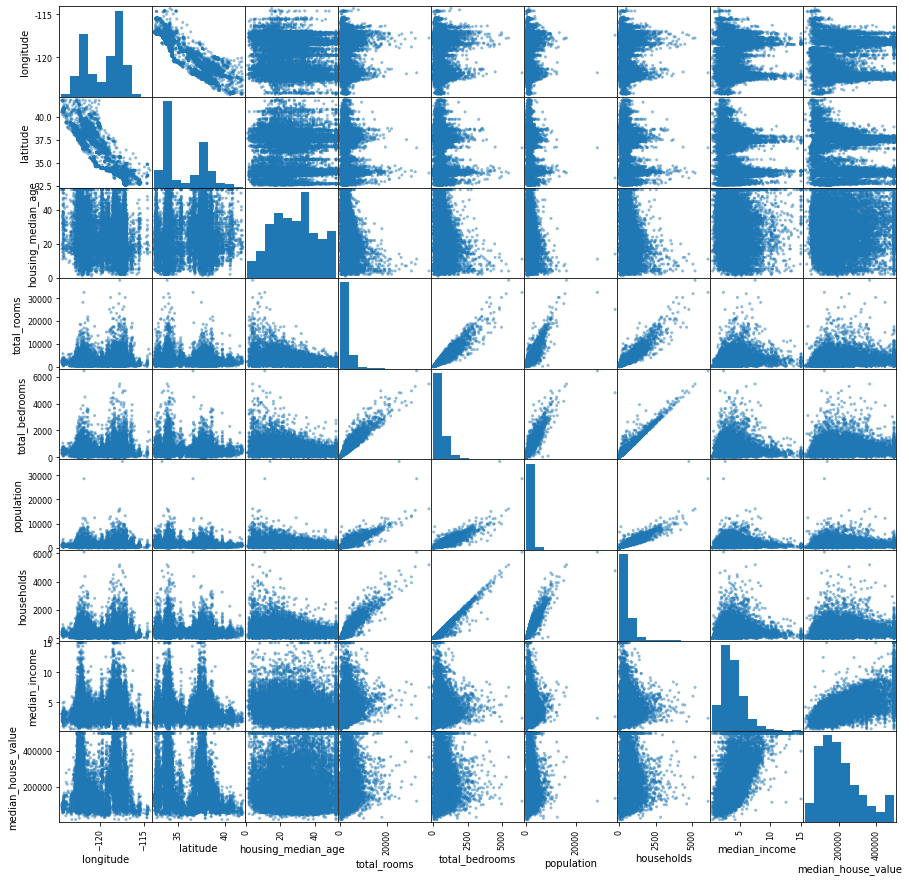

In [83]:
from pandas.plotting import scatter_matrix
scatter_matrix(df);

# **Part 2: Using tf.keras**

In [88]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [92]:
#check out the documentation for other arguments
tf.keras.utils.get_file('auto-mpg.data','https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

30286/30286 [==============================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [93]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [100]:
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# **Part 3: Upload the file yourself**

In [ ]:
from google.colab import files
uploaded = files.upload() # elegir que quieres subir desde tu pc
# puedes importar ficheros .py para luego usar sus funciones

# **Part 4: Access files from Google Drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# check current directory - now gdrive is there
!ls

In [ ]:
# what's in gdrive?
!ls gdrive